In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')

In [3]:
df.shape

(207, 61)

In [4]:
col_names = []
for x in range(61):
    col_names.append('f'+ str(x))

In [5]:
df.columns = col_names

In [6]:
df.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [7]:
df.rename(columns={'f60':'Label'}, inplace=True)

In [8]:
df.Label.value_counts()

M    111
R     96
Name: Label, dtype: int64

In [9]:
df_cap = pd.get_dummies(df['Label'])

In [10]:
df['is_M'] = df_cap['M']

In [11]:
df.head(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f52,f53,f54,f55,f56,f57,f58,f59,Label,is_M
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,0


In [12]:
df[df.Label == 'R'][['Label','is_M']].head(5)

,Label,is_M
0,R,0
1,R,0
2,R,0
3,R,0
4,R,0


In [13]:
df[df.Label == 'M'][['Label','is_M']].head(5)

,Label,is_M
96,M,1
97,M,1
98,M,1
99,M,1
100,M,1


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
y = df['is_M']
X = df.iloc[ : , :60]

In [16]:
logreg=LogisticRegression(solver='lbfgs')

In [17]:
logreg.fit(X,y)

LogisticRegression()

In [18]:
Actual = y
Predicted = logreg.predict(X)

In [19]:
dl = {'Actual' : Actual, 'Predicted' : Predicted}
Comp_DF = pd.DataFrame(dl)

In [20]:
Comp_DF.tail(10)

,Actual,Predicted
197,1,1
198,1,1
199,1,1
200,1,1
201,1,1
202,1,1
203,1,1
204,1,0
205,1,1
206,1,1


In [21]:
all = Comp_DF.shape[0]

In [22]:
correct = Comp_DF[Comp_DF.Actual == Comp_DF.Predicted].shape[0]

In [23]:
print(correct/all*100)

83.09178743961353


# K Nearest Neighbor

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
KNN_1 = KNeighborsClassifier(n_neighbors=1)

In [26]:
KNN_1.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [27]:
Actual = y 
Predicted = KNN_1.predict(X)

In [28]:
print(metrics.accuracy_score(Actual,Predicted)*100)

100.0


 ### K = 4
 


In [29]:
KNN_4 = KNeighborsClassifier(n_neighbors=4)

In [30]:
KNN_4.fit(X,y)

KNeighborsClassifier(n_neighbors=4)

In [31]:
Actual = y
Predicted = KNN_4.predict(X)

In [32]:
print(metrics.accuracy_score(Actual,Predicted)*100)

90.33816425120773


 ### K = 5

In [33]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)

In [34]:
KNN_5.fit(X,y)

KNeighborsClassifier()

In [35]:
Actual = y
Predicted = KNN_5.predict(X)

In [36]:
print(metrics.accuracy_score(Actual, Predicted)*100)

86.95652173913044


In [37]:
Range = list(range(1,30))

In [38]:
li=[]
for i in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X,y)
    Actual = y
    Predicted = KNN.predict(X)
    li.append(metrics.accuracy_score(Actual,Predicted)*100)

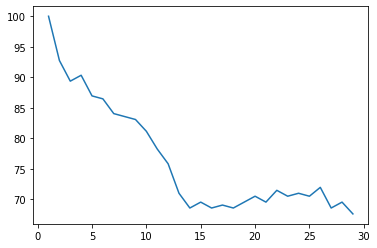

In [39]:
plt.plot(Range,li)
plt.show()

### Decision trees

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
Tree = DecisionTreeClassifier(criterion='gini')

In [42]:
Tree.fit(X,y)

DecisionTreeClassifier()

In [43]:
Actual = y
Predicated = Tree.predict(X)

In [44]:
print(metrics.accuracy_score(Actual,Predicated)*100)

100.0


KNN K = 1 i Drzwo decyzyjne dały 100 % celności ale:
1. Train and test na tych samych danych 
2. KNN = 1 musi dać nam 100% bo zawsze patrzy na najbliższego sąsiada. 

 # Separate test and train data


## Logistic Regresion

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2)

In [47]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)
Actual= y_test
Predicted = logreg.predict(X_test)

In [48]:
print(metrics.accuracy_score(Actual, Predicted)*100)

78.84615384615384


## KNN

In [49]:
KNN_1 = KNeighborsClassifier(n_neighbors=1)
KNN_1.fit(X_train, y_train)
Actual = y_test
Predicted = KNN_1.predict(X_test)

In [50]:
print(metrics.accuracy_score(Actual,Predicted)*100)

82.6923076923077


In [51]:
KNN_4 = KNeighborsClassifier(n_neighbors=4)
KNN_4.fit(X_train, y_train)
Actual = y_test
Predicted = KNN_4.predict(X_test)

In [52]:
print(metrics.accuracy_score(Actual,Predicted)*100)

84.61538461538461


In [53]:
Range = list(range(1,30))

In [54]:
li=[]
for i in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    Actual = y_test
    Predicted = KNN.predict(X_test)
    li.append(metrics.accuracy_score(Actual,Predicted)*100)

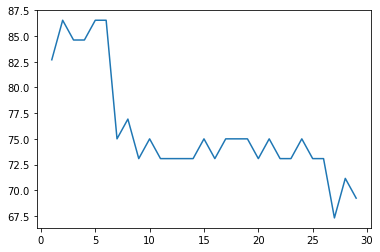

In [55]:
plt.plot(Range,li)
plt.show()

## Decision Trees

In [56]:
Tree = DecisionTreeClassifier(criterion='gini')
Tree.fit(X_train, y_train)
Actual = y_test
Predicted = Tree.predict(X_test)

In [57]:
print(metrics.accuracy_score(Actual,Predicted)*100)

71.15384615384616


### Podsumowanie

Najlepszy wynik otrzymaliśmy z train and Test KNN ok. 6,5 (~87%)